In [ ]:
# Installing Libraries

!pip install transformers -q
!python -m pip install gensim==4.2.0 -q
!pip install --upgrade gensim -q
!pip install tweepy -q
!pip install textblob -q
!pip install protobuf==3.20.1 -q
!pip install zeugma -q
!pip install pyLDAvis -q
!pip install glove_py -q
!python -m pip install seaborn -q
!python -m pip install wordcloud -q
!python -m spacy download en_core_web_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.1 which is incompatible.
googleapis-common-protos 1.59.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.


In [ ]:
# Import Data

job_descriptions = pd.read_csv("job_descriptions.csv")
udemy_master_df = pd.read_csv("udemy_master_df.csv")
udemy_master_df.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(44635, 9)

In [ ]:
# View job_description data

job_descriptions.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source
0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent
1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent
2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent
3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent
4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent


In [ ]:
# Remove NaN values

udemy_master_df = udemy_master_df[udemy_master_df['Summary'].notna()]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# select feature variables needed

job_df = job_descriptions[['Title']]
udemy_master_df = udemy_master_df[['Title','Summary']]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
job_df.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19265, 1)

In [ ]:
udemy_master_df.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(44625, 2)

In [ ]:
# checking the job-title data for nan values

check_nan = job_df['Title'].isnull().sum()
check_nan

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
# checking the course-title data for nan values

check_nan = udemy_master_df['Title'].isnull().sum()
check_nan

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
# checking the course-description data for nan values

check_nan = udemy_master_df['Summary'].isnull().sum()
check_nan

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
# import gloVe text library from Stanford University's website

!wget http://nlp.stanford.edu/data/glove.6B.zip -q

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Archive gloVe file

!unzip glove*.zip -q

Archive:  glove.6B.zip
caution: filename not matched:  -q


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Check the file contents of notebook folder

!ls
!pwd

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


data_df3.csv  job_descriptions.csv	  sample_data
glove.6B.zip  monster_com-job_sample.csv  udemy_master_df.csv
/content


In [ ]:
# Unzip gloVe file

import zipfile
with zipfile.ZipFile('/content/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/glove.6B')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a dictionary for imported gloVe text data, split the text, and create an array of float32 data

print('Indexing word vectors.')
glove_path = '/content/glove.6B/glove.6B.100d.txt'
glove_dict = {}
with open(glove_path, "r", encoding="utf-8") as f:
  #embeddings_index = {}
  f = open(glove_path, encoding='utf-8')
  for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      glove_dict[word] = coefs
#f.close()

print('Found %s word vectors.' % len(glove_dict))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Indexing word vectors.
Found 400000 word vectors.


In [ ]:
# Use gensim to prepend lines

import os
import shutil
import smart_open
from sys import platform

import gensim


def prepend_line(infile, outfile, line):
	""" 
	Function use to prepend lines using bash utilities in Linux. 
	(source: http://stackoverflow.com/a/10850588/610569)
	"""
	with open(infile, 'r') as old:
		with open(outfile, 'w') as new:
			new.write(str(line) + "\n")
			shutil.copyfileobj(old, new)

def prepend_slow(infile, outfile, line):
	"""
	Slower way to prepend the line by re-creating the inputfile.
	"""
	with open(infile, 'r') as fin:
		with open(outfile, 'w') as fout:
			fout.write(line + "\n")
			for line in fin:
				fout.write(line)

def get_lines(glove_file_name):
    """Return the number of vectors and dimensions in a file in GloVe format."""
    with smart_open.smart_open(glove_file_name, 'r') as f:
        num_lines = sum(1 for line in f)
    with smart_open.smart_open(glove_file_name, 'r') as f:
        num_dims = len(f.readline().split()) - 1
    return num_lines, num_dims 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assign gloVe text file to a variable and prepend gensim files


# Input: GloVe Model File
# More models can be downloaded from http://nlp.stanford.edu/projects/glove/
glove_file="/content/glove.6B/glove.6B.100d.txt"

num_lines, dims = get_lines(glove_file)

# Output: Gensim Model text format.
gensim_file='glove_model2.txt'
gensim_first_line = "{} {}".format(num_lines, dims)

# Prepends the line.
if platform == "linux" or platform == "linux2":
	prepend_line(glove_file, gensim_file, gensim_first_line)
else:
	prepend_slow(glove_file, gensim_file, gensim_first_line)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
# Import data_df3 file containing course and job data from a previous data-extraction

data_df3 = pd.read_csv("data_df3.csv")
data_df3.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(44630, 9)

In [ ]:
# Check dataframe for null values

data_df3.isnull().sum()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                       0
Course_Title                   552
Course_Summary                 749
job_title                    22631
job_description              22630
course_title_tokens              5
course_description_tokens        5
job_title_tokens             22630
job_description_tokens       22630
dtype: int64

In [ ]:
# Drop nan (unknown) values from the dataframe

data_df3.dropna(how='any',inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# check the number of rows and columns in the dataframe after dropping na (unknown) values

data_df3.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(21779, 9)

In [ ]:
#make all reviews lowercase.
data_df3['Summary_text'] = data_df3['Course_Summary'].apply(lambda x: x.lower())

#make all course titles lowercase
data_df3['Title_text'] = data_df3['Course_Title'].apply(lambda x: x.lower())

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#A contractions dictionary from Wikipedia found on Stack Overflow for expanding contractions: 
#https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#This code is code to expand contractions in text created by Abhishek Sharma:
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

#Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

#Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
data_df3['Summary_text']= data_df3['Summary_text'].apply(lambda x:expand_contractions(x))
data_df3['Title_text']= data_df3['Title_text'].apply(lambda x:expand_contractions(x))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a function to perform preprocessing cleaning and tokenizing on the text data

def clean_tokenize_text(df,column, token_column_name):
    """
    
    This function cleans and tokenizes the text in the column specified 

        - strip punctuation
        - remove multiple whitespace
        - remove numeric characters
        - tokenize words
        - return a lower-case stemmed version of the text
        - remove common STOPWORDS (imported from gensim's Stone, Denis, Kwantes (2010) dataset)
        - remove CUSTOM_STOP_WORDS, defined above
 
    """
    df[column] = df[column].astype(str)
      
    #apply gensim default preprocess
    df[token_column_name] = df[column].apply(lambda x: preprocess_string(x))
    
    #remove gensim stop words
    df[token_column_name] = df[token_column_name].apply(lambda x: [item for item in x if item not in STOPWORDS])
    
    #remove custom stop words
    df[token_column_name] = df[token_column_name].apply(lambda x: [item for item in x if item not in CUSTOM_STOP_WORDS])

    
    return df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Perform a cleaning & tokenizing on the 'Title_text'(Course Title) text data

CUSTOM_STOP_WORDS = ['Learn', 'Beginner', 'Course', 'Create']

course_title_tokens_udemy_df = clean_tokenize_text(data_df3,'Title_text', 'course_title_tokens')
course_title_tokens_udemy_df[['Title_text', 'course_title_tokens']].head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title_text,course_title_tokens
0,the complete sql bootcamp 2020 go from zero to...,"[complet, sql, bootcamp, zero, hero]"
1,tableau 2020 a z hands on tableau training for...,"[tableau, hand, tableau, train, data, scienc]"
2,pmp exam prep seminar pmbok guide 6,"[pmp, exam, prep, seminar, pmbok, guid]"
3,the complete financial analyst course 2020,"[complet, financi, analyst, cours]"
4,an entire mba in 1 course award winning busine...,"[entir, mba, cours, award, win, busi, school, ..."


In [ ]:
# Perform a cleaning and tokenizing on the 'Summary_text' (Course Description) text data

course_description_tokens_udemy_df = clean_tokenize_text(data_df3,'Summary_text', 'course_description_tokens')
course_description_tokens_udemy_df[['Summary_text', 'course_description_tokens']].head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Summary_text,course_description_tokens
0,become an expert at sql,"[expert, sql]"
1,learn tableau 2020 for data science step by st...,"[learn, tableau, data, scienc, step, step, rea..."
2,pmp exam prep seminar earn 35 pdus by completi...,"[pmp, exam, prep, seminar, earn, pdu, complet,..."
3,excel accounting financial statement analysis ...,"[excel, account, financi, statement, analysi, ..."
4,1 best selling business course everything you ...,"[best, sell, busi, cours, need, know, busi, st..."


In [ ]:
# Apply the expand_contractions function created earlier to the job_description and job_title text data

data_df3['job_description_text']= data_df3['job_description'].apply(lambda x:expand_contractions(x))
data_df3['job_title_text']= data_df3['job_title'].apply(lambda x:expand_contractions(x))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Perform a cleaning & tokenizing on the 'job_title_text' data

CUSTOM_STOP_WORDS = ['Job','job','Manager','Ability','responsible'] 

job_title_tokens_df = clean_tokenize_text(data_df3,'job_title_text', 'job_title_tokens')
job_title_tokens_df[['job_title_text', 'job_title_tokens']].head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,job_title_text,job_title_tokens
0,it support technician job in madison,"[support, technician, madison]"
1,business reporter editor job in madison,"[busi, report, editor, madison]"
2,johnson johnson family of companies job applic...,"[johnson, johnson, famili, compani, applic, se..."
3,engineer quality job in dixon,"[engin, qualiti, dixon]"
4,shift supervisor part time job in camphill,"[shift, supervisor, time, camphil]"


In [ ]:
# Perform a cleaning and tokenizing on the 'job_description_text' data

job_description_tokens_df = clean_tokenize_text(data_df3,'job_description_text', 'job_description_tokens')
job_description_tokens_df[['job_description_text', 'job_description_tokens']].head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,job_description_text,job_description_tokens
0,teamsoft is seeing an it support specialist to...,"[teamsoft, support, specialist, join, client, ..."
1,the wisconsin state journal is seeking a flexi...,"[wisconsin, state, journal, seek, flexibl, mot..."
2,report this job about the job depuy synthes co...,"[report, depui, synth, compani, member, johnso..."
3,why join altec if you re considering a career ...,"[join, altec, consid, career, altec, better, t..."
4,position id 76162 positions 1 state ct city fa...,"[posit, posit, state, citi, fairfield, categor..."


In [ ]:
# Assign preprocessed & tokenized feature variables to a variable name

processed_title = course_title_tokens_udemy_df['Title_text']
processed_description = course_description_tokens_udemy_df['Summary_text']
job_title = job_title_tokens_df['job_title_text']
job_description = job_description_tokens_df['job_description_text']
course_title_tokens = course_title_tokens_udemy_df['course_title_tokens']
course_description_tokens = course_description_tokens_udemy_df['course_description_tokens']
job_title_tokens = job_title_tokens_df['job_title_tokens']
job_description_tokens = job_description_tokens_df['job_description_tokens']

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a new dataframe using the preprocessed and tokenized text data

d = {'Course_Title':processed_title, 'Course_Summary':processed_description, 'job_title':job_title, 'job_description':job_description, 'course_title_tokens':course_title_tokens, 'course_description_tokens':course_description_tokens, 'job_title_tokens':job_title_tokens, 'job_description_tokens':job_description_tokens}
data_df4 = pd.DataFrame(data=d)
data_df4.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Course_Title,Course_Summary,job_title,job_description,course_title_tokens,course_description_tokens,job_title_tokens,job_description_tokens
0,the complete sql bootcamp 2020 go from zero to...,become an expert at sql,it support technician job in madison,teamsoft is seeing an it support specialist to...,"[complet, sql, bootcamp, zero, hero]","[expert, sql]","[support, technician, madison]","[teamsoft, support, specialist, join, client, ..."
1,tableau 2020 a z hands on tableau training for...,learn tableau 2020 for data science step by st...,business reporter editor job in madison,the wisconsin state journal is seeking a flexi...,"[tableau, hand, tableau, train, data, scienc]","[learn, tableau, data, scienc, step, step, rea...","[busi, report, editor, madison]","[wisconsin, state, journal, seek, flexibl, mot..."
2,pmp exam prep seminar pmbok guide 6,pmp exam prep seminar earn 35 pdus by completi...,johnson johnson family of companies job applic...,report this job about the job depuy synthes co...,"[pmp, exam, prep, seminar, pmbok, guid]","[pmp, exam, prep, seminar, earn, pdu, complet,...","[johnson, johnson, famili, compani, applic, se...","[report, depui, synth, compani, member, johnso..."
3,the complete financial analyst course 2020,excel accounting financial statement analysis ...,engineer quality job in dixon,why join altec if you re considering a career ...,"[complet, financi, analyst, cours]","[excel, account, financi, statement, analysi, ...","[engin, qualiti, dixon]","[join, altec, consid, career, altec, better, t..."
4,an entire mba in 1 course award winning busine...,1 best selling business course everything you ...,shift supervisor part time job in camphill,position id 76162 positions 1 state ct city fa...,"[entir, mba, cours, award, win, busi, school, ...","[best, sell, busi, cours, need, know, busi, st...","[shift, supervisor, time, camphil]","[posit, posit, state, citi, fairfield, categor..."


In [ ]:
# Select only 1000 pieces of text data to allow quicker testing for coding errors (when needed)

#data_df4 = data_df4[:1000]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# View the newly preprocessed & tokenized data in a dataframe

data_df4.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Course_Title,Course_Summary,job_title,job_description,course_title_tokens,course_description_tokens,job_title_tokens,job_description_tokens
0,the complete sql bootcamp 2020 go from zero to...,become an expert at sql,it support technician job in madison,teamsoft is seeing an it support specialist to...,"[complet, sql, bootcamp, zero, hero]","[expert, sql]","[support, technician, madison]","[teamsoft, support, specialist, join, client, ..."
1,tableau 2020 a z hands on tableau training for...,learn tableau 2020 for data science step by st...,business reporter editor job in madison,the wisconsin state journal is seeking a flexi...,"[tableau, hand, tableau, train, data, scienc]","[learn, tableau, data, scienc, step, step, rea...","[busi, report, editor, madison]","[wisconsin, state, journal, seek, flexibl, mot..."
2,pmp exam prep seminar pmbok guide 6,pmp exam prep seminar earn 35 pdus by completi...,johnson johnson family of companies job applic...,report this job about the job depuy synthes co...,"[pmp, exam, prep, seminar, pmbok, guid]","[pmp, exam, prep, seminar, earn, pdu, complet,...","[johnson, johnson, famili, compani, applic, se...","[report, depui, synth, compani, member, johnso..."
3,the complete financial analyst course 2020,excel accounting financial statement analysis ...,engineer quality job in dixon,why join altec if you re considering a career ...,"[complet, financi, analyst, cours]","[excel, account, financi, statement, analysi, ...","[engin, qualiti, dixon]","[join, altec, consid, career, altec, better, t..."
4,an entire mba in 1 course award winning busine...,1 best selling business course everything you ...,shift supervisor part time job in camphill,position id 76162 positions 1 state ct city fa...,"[entir, mba, cours, award, win, busi, school, ...","[best, sell, busi, cours, need, know, busi, st...","[shift, supervisor, time, camphil]","[posit, posit, state, citi, fairfield, categor..."


In [ ]:
# Rename the dataframe

df_courses = data_df4

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import libraries

import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import spacy
from transformers import BertTokenizer, TFBertModel, TFRobertaModel, RobertaTokenizer

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load spaCy model for text processing
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pickle

df_courses.to_pickle("./df_courses.pkl")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Clean and process job title
job_title = input('Enter job title: ')
job_title_processed = ' '.join([token.lemma_ for token in nlp(job_title.lower()) if not token.is_stop and token.is_alpha])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter job title: administrative assistant


In [ ]:
# define the get_glove_embedding(text) to prepare for application of the glove embedding model to the text data

def get_glove_embedding(text):
    embedding = np.zeros(100)
    doc = nlp(text)
    for token in doc:
        if token.text in glove_dict:
            embedding += glove_dict[token.text]
    return embedding / len(doc)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate GloVe embeddings for course titles and descriptions
df_courses['glove_embedding_title'] = df_courses['Course_Title'].apply(lambda x: get_glove_embedding(x))
df_courses['glove_embedding_description'] = df_courses['Course_Summary'].apply(lambda x: get_glove_embedding(x))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate GloVe embeddings for job title
job_title_embedding = get_glove_embedding(job_title_processed)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate cosine similarity between job title embedding and course title and description embeddings
df_courses['cosine_similarity_title'] = df_courses['glove_embedding_title'].apply(lambda x: cosine_similarity([job_title_embedding], [x])[0][0])
df_courses['cosine_similarity_description'] = df_courses['glove_embedding_description'].apply(lambda x: cosine_similarity([job_title_embedding], [x])[0][0])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Order courses by descending cosine similarity score
df_courses = df_courses.sort_values(['cosine_similarity_title', 'cosine_similarity_description'], ascending=False)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# View the new columns (feature variables) added to the dataframe

df_courses.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Course_Title,Course_Summary,job_title,job_description,course_title_tokens,course_description_tokens,job_title_tokens,job_description_tokens,glove_embedding_title,glove_embedding_description,cosine_similarity_title,cosine_similarity_description
1045,artificial intelligence expert certification,a groundbreaking course that uncovers artifici...,system database administrator job in dallas,database administrator must be familiar with m...,"[artifici, intellig, expert, certif]","[groundbreak, cours, uncov, artifici, intellig...","[databas, administr, dalla]","[databas, administr, familiar, multipl, dbm, p...","[-0.007772497832775116, -0.023060195962898433,...","[-0.09535985546452659, 0.10797122712912303, 0....",0.519681,0.312669
18266,ux research,exercite a empatia e conduza sua primeira pesq...,data analyst excel,national healthcare organization is looking fo...,[research],"[exercit, empatia, conduza, sua, primeira, pes...","[data, analyst, excel]","[nation, healthcar, organ, look, strong, excel...","[-0.009855002164840698, 0.055324986577034, -0....","[-0.23234519673596052, -0.09778136455199936, -...",0.495225,0.098183
17283,ux research,aplicando pesquisa com usu rios,premium pet food specialist part time job in d...,summary premium pet food specialist part time ...,[research],"[aplicando, pesquisa, com, usu, rio]","[premium, pet, food, specialist, time, dalla]","[summari, premium, pet, food, specialist, time...","[-0.009855002164840698, 0.055324986577034, -0....","[-0.16786944358609618, -0.04647200107574463, -...",0.495225,-0.013487
4275,amazon fba product research masterclass,find amazing amazon fba private label products...,seasonal holiday retail sales fragrance specia...,descriptionjob overview the seasonal sales fra...,"[amazon, fba, product, research, masterclass]","[amaz, amazon, fba, privat, label, product, la...","[season, holidai, retail, sale, fragranc, spec...","[descriptionjob, overview, season, sale, fragr...","[-0.06412140242755413, 0.056813988089561465, 0...","[-0.10474461460342774, -0.00658131161561379, 0...",0.491666,0.262998
10804,ansys workbench analysis engineering training ...,if you want to be an analysis engineer with an...,retail shift supervisor job in orland,drive your future pilot flying j is committed ...,"[ansi, workbench, analysi, engin, train, program]","[want, analysi, engin, ansi, workbench, join, ...","[retail, shift, supervisor, orland]","[drive, futur, pilot, fly, commit, life, bette...","[-0.024848547376071412, 0.3115733290712039, -0...","[-0.3073488098369645, 0.2401592159377677, 0.36...",0.468504,0.286529


In [ ]:
# Print top 10 course recommendations for "Data Scientist" ; data_count = 21779
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                            Course_Title  \
1045        artificial intelligence expert certification   
18266                                        ux research   
17283                                        ux research   
4275             amazon fba product research masterclass   
10804  ansys workbench analysis engineering training ...   
11827                             acoustical engineering   
13847  certified forensic engineering investigator fo...   
6913   data science interview prep kit 2020 be a data...   
10965  adobe illustrator masterclass learn from an ex...   
18388                              desk research para ux   

                                          Course_Summary  \
1045   a groundbreaking course that uncovers artifici...   
18266  exercite a empatia e conduza sua primeira pesq...   
17283                    aplicando pesquisa com usu rios   
4275   find amazing amazon fba private label products...   
10804  if you want to be an analysis en

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "Data Scientist" ; data_count = 1000
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                          Course_Title  \
502               qliksense data architect masterclass   
474                                  spss for research   
842  tableau 2020 certified associate exam guide a ...   
696  digital strategy formulation become a strategy...   
64                         master sql for data science   
165  bestseller python data analysis visualization ...   
426  conduct a strategy analysis using business ana...   
606  colors for data science a z data visualization...   
868   tableau training master tableau for data science   
9        the business intelligence analyst course 2020   

                                        Course_Summary  \
502                  the qlik sense developer bootcamp   
474  spss data analysis made easy become an expert ...   
842  get ready for tableau 2020 certification deskt...   
696  strategy 1 digital transformation learn how to...   
64   become a sql query wizard and never be afraid ...   
165  financia

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "Registered Nurse"; data_count = 21779
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                            Course_Title  \
313                         become a pharmacy technician   
8211   medicare provider enrollment for a physical th...   
7275               the family and medical leave act fmla   
6601   certified supply chain professional practice e...   
20499  you can pass the certified management accounta...   
278    counselling children adolescents accredited ce...   
5371   own and operate a child identification home ba...   
1439                  certified quality auditor training   
1778      certified electronic health records specialist   
8444   certified supply chain professional practice t...   

                                          Course_Summary  \
313    a video study guide for the pharmacy technicia...   
8211   physical therapist in private practice medicar...   
7275              everything you need to know about fmla   
6601   pass the cscp certification on the first attem...   
20499  know how to pass exam 1 master t

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "Registered Nurse"; data_count = 1000
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                          Course_Title  \
313                       become a pharmacy technician   
278  counselling children adolescents accredited ce...   
677                certified quality engineer training   
841  supervisor leadership skills for a safe workplace   
605   recruiter training hire top employees in 30 days   
551              work from home as a virtual assistant   
726     how to work from home as a business consultant   
743  how to be a freelance translator updated for c...   
394       alteryx self service analytics in your hands   
999  how to train your virtual assistant for ebay d...   

                                        Course_Summary  \
313  a video study guide for the pharmacy technicia...   
278  work from home become a professional counsello...   
677  master the quality engineering concepts compre...   
841  learn safety communication skills to foster sa...   
605  5 courses in 1 proven recruiting formula to hi...   
551  learn ho

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "Customer Service Representatives" ; data_count = 21779
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                           Course_Title  \
9049                                   customer service   
4340  customer service customer support and customer...   
3075                            customer service expert   
3286                   customer service contact centers   
3241  customer service to customer relationship mana...   
6781                            customer service retail   
9570                       exceptional customer service   
2155                        customer service foundation   
3767                          customer service training   
2576                     excellence in customer service   

                                         Course_Summary  \
9049  each and every one of us serves customers whet...   
4340  customer service customer support and customer...   
3075  an expert level course about further understan...   
3286  an introductory course about understanding the...   
3241       moving customers from consumers to advocates

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "Customer Service Representatives" ; data_count = 1000
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                          Course_Title  \
264                   start improving customer service   
73     customer service mastery delight every customer   
623                     product and service management   
470  customer how to build a customer service strategy   
598  2020 customer service 2 0 learn digital custom...   
788  customer service how to sell more without adve...   
60   brilliant customer service how to impress your...   
517             customer how to build customer loyalty   
749   business administration for your business bus102   
359  online marketing business create your agency s...   

                                        Course_Summary  \
264  creating a customer service advantage in your ...   
73   master customer service using this practical c...   
623  know the work that is involved in getting a pr...   
470  for you and your team to be successful in prov...   
598  used by chase intel others learn customer serv...   
788  learn ho

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "Project Manager" ; data_count = 21779
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                           Course_Title  \
4309                         successful project manager   
2051  acing project management ultimate 7h project m...   
9729  project management from beginner to project ma...   
9737  project management from beginner to project ma...   
4058                                 project management   
88    the project management course beginner to proj...   
3528           contract management for project managers   
24    beginning project management project managemen...   
2392  jira 7 for developer administrator project man...   
9777                             managing project teams   

                                         Course_Summary  \
4309  do you want to success in your projects are yo...   
2051  2 in 1 course to 1 learn project management an...   
9729  a compete project management course designed t...   
9737  a compete project management course designed t...   
4058  a simple powerful guide to project management ...

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "Project Manager" ; data_count = 1000
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                          Course_Title  \
88   the project management course beginner to proj...   
24   beginning project management project managemen...   
928     deliver your project master project management   
831                            lean project management   
93   project management master project management p...   
280  project management with ms project scheduling ...   
645          trello project management complete course   
187           the complete finance manager course 2020   
588  capacity release project planning with jira po...   
489      project management getting started and beyond   

                                        Course_Summary  \
88   the complete course for becoming a successful ...   
24   project management growing a successful career...   
928                                  on time in budget   
831  learn how to apply the the principles of lean ...   
93   master project management using this practical...   
280  managing

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "DevOps Engineer" ; data_count = 21779
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                            Course_Title  \
677                  certified quality engineer training   
15170                    sheetmetal design for engineers   
12693  autocad electrical for automation electrical e...   
15084  technical office engineer in roads section aut...   
18488                          inventor chapas met licas   
11752         mechanical engineering machine designing 1   
11827                             acoustical engineering   
12351             mechanical engineering design overview   
17740               learning autocad for civil engineers   
11420  become a fire protection design engineer basic...   

                                          Course_Summary  \
677    master the quality engineering concepts compre...   
15170                       sheetmetal design guidelines   
12693  not just autocad electrical commands but vfd s...   
15084  how to export working points for roads constru...   
18488                 aprenda a modelar

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "DevOps Engineer" ; data_count = 1000
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                          Course_Title  \
677                certified quality engineer training   
313                       become a pharmacy technician   
502               qliksense data architect masterclass   
849         an introduction to reliability engineering   
87                             innovation master class   
280  project management with ms project scheduling ...   
881       construction claims master foundation course   
364   communication skills every manager should master   
395  the art of communications become a master comm...   
800  manufacturing operations planning management a...   

                                        Course_Summary  \
677  master the quality engineering concepts compre...   
313  a video study guide for the pharmacy technicia...   
502                  the qlik sense developer bootcamp   
849  a study of why things fail and how to measure ...   
87   the most comprehensive course available on dev...   
280  managing

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "Driver" ; data_count = 21779
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                            Course_Title  \
13138  automobile safety understanding car crashes fo...   
8433   how to get your class a cdl and become a truck...   
7549                                  car deal dominator   
11645     car design sketching render a car in photoshop   
4971   mastering turo car sharing the airbnb of vehic...   
6122                    employee onboarding crash course   
13941  designers s essential sketch car like a pro de...   
1831   optimizing travelling salesman and vehicle rou...   
613           train the trainer pro no beginners allowed   
891       how to flip cars like a pro learn car flipping   

                                          Course_Summary  \
13138  surviving an accident by understanding physics...   
8433   start your new career and a new adventure in l...   
7549   how to research locate and negotiate the best ...   
11645  car design sketching learn the easy way to ske...   
4971   the comprehensive guide to manag

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "Driver" ; data_count = 1000
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                          Course_Title  \
613         train the trainer pro no beginners allowed   
891     how to flip cars like a pro learn car flipping   
727  tableau crash course build and share a covid 1...   
216               think like a leader with brian tracy   
311               leading virtual teams a quick course   
940  a beginner s guide to replacing your job with ...   
814  complete media training master class confidenc...   
880  get your pgmp certification on your first atte...   
226  unconscious bias fuel diversity and become a b...   
8    become a product manager learn the skills get ...   

                                        Course_Summary  \
613  leverage elite training techniques that set yo...   
891  the step by step guide to buying and selling c...   
727  in this crash course you are going to learn ho...   
216  change your day to day habits to become a powe...   
311  how to optimize the effectiveness of virtual t...   
940  proven t

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "administrative assistant" ; data_count = 21779
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                           Course_Title  \
1608        fundamentals of administrative professional   
1146         chief financial officer leadership program   
3053             virtual personal assistant development   
1833   executive coaching and business case development   
6237  general management leadership and functions of...   
3348                              office management 101   
3350                              office management 101   
6867                   understanding executive coaching   
8570                   executive communication training   
1574  management coaching become an effective coachi...   

                                         Course_Summary  \
1608  learn the skills and roles of an administrativ...   
1146  an ever expanding program of courses helping f...   
3053  explore incredible virtual assistant tools in ...   
1833  the guide to executive coaching and business c...   
6237                  fundamental of general management

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print top 10 course recommendations for "administrative assistant" ; data_count = 1000
print(df_courses[['Course_Title', 'Course_Summary', 'cosine_similarity_title', 'cosine_similarity_description']].head(10))

                                          Course_Title  \
810                         become a virtual assistant   
571  management coaching employee performance coach...   
797  employee engagement management coaching certif...   
967  lead auditor tools for a professional internal...   
800  manufacturing operations planning management a...   
136  time and task management time management techn...   
830              introduction to managerial accounting   
987   become a master of client and account management   
551              work from home as a virtual assistant   
364   communication skills every manager should master   

                                        Course_Summary  \
810  live free work virtually virtual assistant tra...   
571  set expectations assess performance provide fe...   
797  new manager essentials communication skills tr...   
967  you shall you will be able to carry out a pro ...   
800  cutting edge production management methods tha...   
136  time man

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Create a table of the cosine similarity data for further visuals and analysis

d = {'Data_Scientist_Title_Cosine_Similarity':[0.519681, 0.495225, 0.495225, 0.491666, 0.468504, 0.466858, 0.466439, 0.458495, 0.456573, 0.453299], 'Data_Scientist_Description_Cosine_Similarity':[0.312669, 0.098183, -0.013487, 0.262998, 0.286529, 0.155433, 0.266503, 0.249336, 0.254740, 0.387764], 'Registered_Nurse_Title_Cosine_Similarity':[0.649832, 0.649069, 0.648886, 0.638437, 0.637921, 0.633934, 0.633543, 0.628356, 0.627811, 0.624350], 'Registered_Nurse_Description_Cosine_Similarity': [0.656500, 0.630892, 0.499591, 0.483439, 0.538470, 0.639046, 0.561437, 0.585906, 0.494829, 0.520644], 'Customer_Service_Representatives_Title_Cosine_Similarity':[0.927126, 0.906311, 0.900890, 0.895038, 0.885665, 0.883835, 0.882394, 0.874894, 0.874215, 0.865994], 'Customer_Service_Representatives_Description_Cosine_Similarity':[0.702604, 0.899480, 0.747348, 0.748796, 0.690360, 0.747169, 0.662500, 0.728242, 0.799385, 0.774581], 'Project_Manager_Title_Cosine_Similarity':[0.950577, 0.901851, 0.890921, 0.890921, 0.878975, 0.869625, 0.861692, 0.860080, 0.854732, 0.851844], 'Project_Manager_Description_Cosine_Similarity':[0.711430, 0.757151, 0.814572, 0.814572, 0.687449, 0.807596, 0.724436, 0.860176, 0.648140, 0.851844], 'DevOps_Engineer_Title_Cosine_Similarity':[0.713995, 0.653508, 0.644874, 0.635388, 0.633051, 0.630178, 0.618021, 0.614952, 0.609252, 0.608271], 'DevOps_Engineer_Description_Cosine_Similarity':[0.573524, 0.363130, 0.451894, 0.372662, 0.439719, 0.423658, 0.314488, 0.564490, 0.412370, 0.597933], 'Driver_Title_Cosine_Similarity':[0.683318, 0.657513, 0.624475, 0.618859, 0.615946, 0.611005, 0.608560, 0.606875, 0.600721, 0.595573], 'Driver_Description_Cosine_Similarity':[0.593368, 0.604128, 0.487685, 0.527865, 0.549285, 0.421824, 0.584338, 0.397219, 0.479949, 0.488854], 'administrative_assistant_Title_Cosine_Similarity':[0.743878, 0.702960, 0.699746, 0.698947, 0.696105, 0.692342, 0.692342, 0.685564, 0.684295, 0.682072], 'administrative_assistant_Description_Cosine_Similarity':[0.674039, 0.561840, 0.540332, 0.626250, 0.653299, 0.507984, 0.507984, 0.504759, 0.457972, 0.585919]}
cosine_df = pd.DataFrame(data=d)
cosine_df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Data_Scientist_Title_Cosine_Similarity,Data_Scientist_Description_Cosine_Similarity,Registered_Nurse_Title_Cosine_Similarity,Registered_Nurse_Description_Cosine_Similarity,Customer_Service_Representatives_Title_Cosine_Similarity,Customer_Service_Representatives_Description_Cosine_Similarity,Project_Manager_Title_Cosine_Similarity,Project_Manager_Description_Cosine_Similarity,DevOps_Engineer_Title_Cosine_Similarity,DevOps_Engineer_Description_Cosine_Similarity,Driver_Title_Cosine_Similarity,Driver_Description_Cosine_Similarity,administrative_assistant_Title_Cosine_Similarity,administrative_assistant_Description_Cosine_Similarity
0,0.519681,0.312669,0.649832,0.656500,0.927126,0.702604,0.950577,0.711430,0.713995,0.573524,0.683318,0.593368,0.743878,0.674039
1,0.495225,0.098183,0.649069,0.630892,0.906311,0.899480,0.901851,0.757151,0.653508,0.363130,0.657513,0.604128,0.702960,0.561840
2,0.495225,-0.013487,0.648886,0.499591,0.900890,0.747348,0.890921,0.814572,0.644874,0.451894,0.624475,0.487685,0.699746,0.540332
3,0.491666,0.262998,0.638437,0.483439,0.895038,0.748796,0.890921,0.814572,0.635388,0.372662,0.618859,0.527865,0.698947,0.626250
4,0.468504,0.286529,0.637921,0.538470,0.885665,0.690360,0.878975,0.687449,0.633051,0.439719,0.615946,0.549285,0.696105,0.653299


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


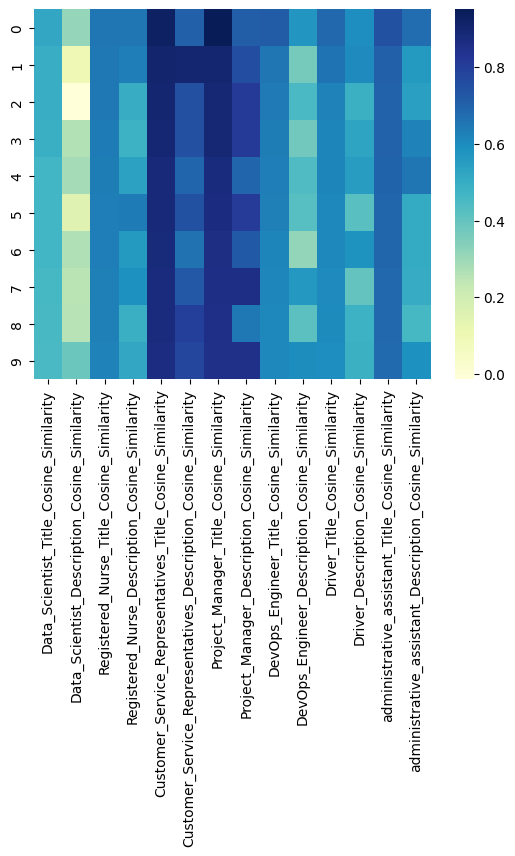

In [ ]:
# Using a heatmap to visualize the cosine similarity matrix as a chart
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap using the seaborn library
sns.heatmap(cosine_df, cmap="YlGnBu")

# Display the heatmap
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Axes: >

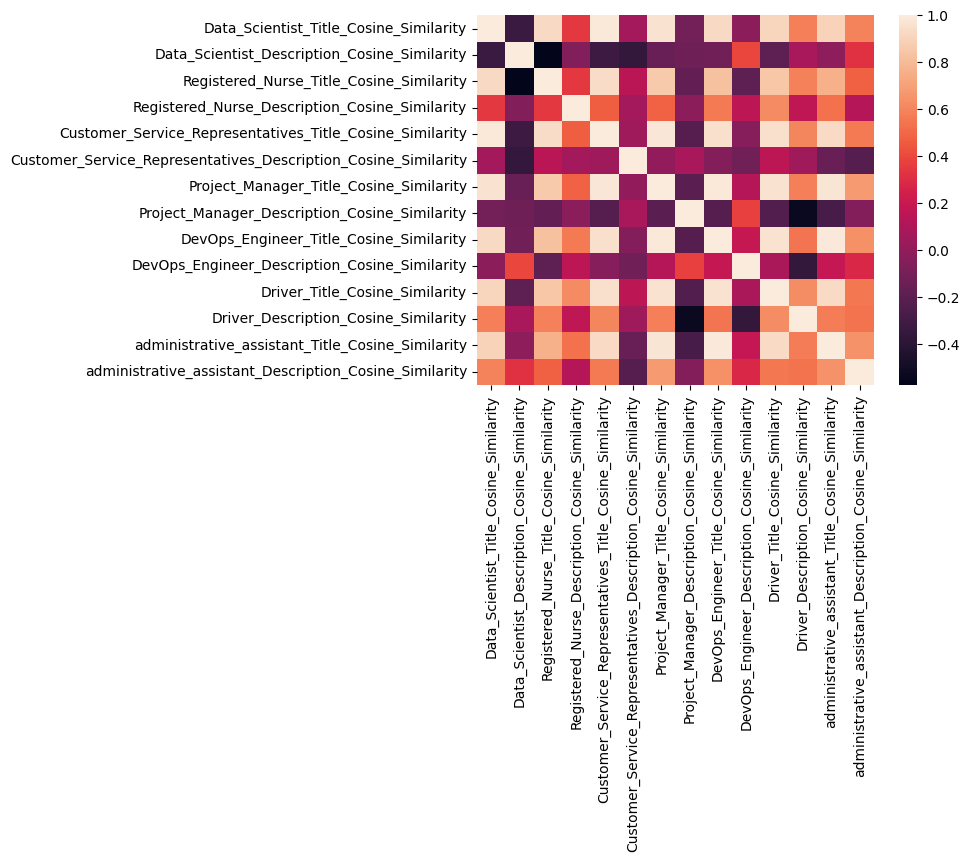

In [324]:
#Plotting a seaborn heatmap using the cosine similarity data from job-titles, course-titles, and course-descriptions

import seaborn as sns
corr = cosine_df.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
#Plotting a plotly express heatmap that displays the x-parameter, y-parameter, and percent correlation for each square unit

import plotly.express as px
fig = px.imshow(cosine_df.corr())
fig.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



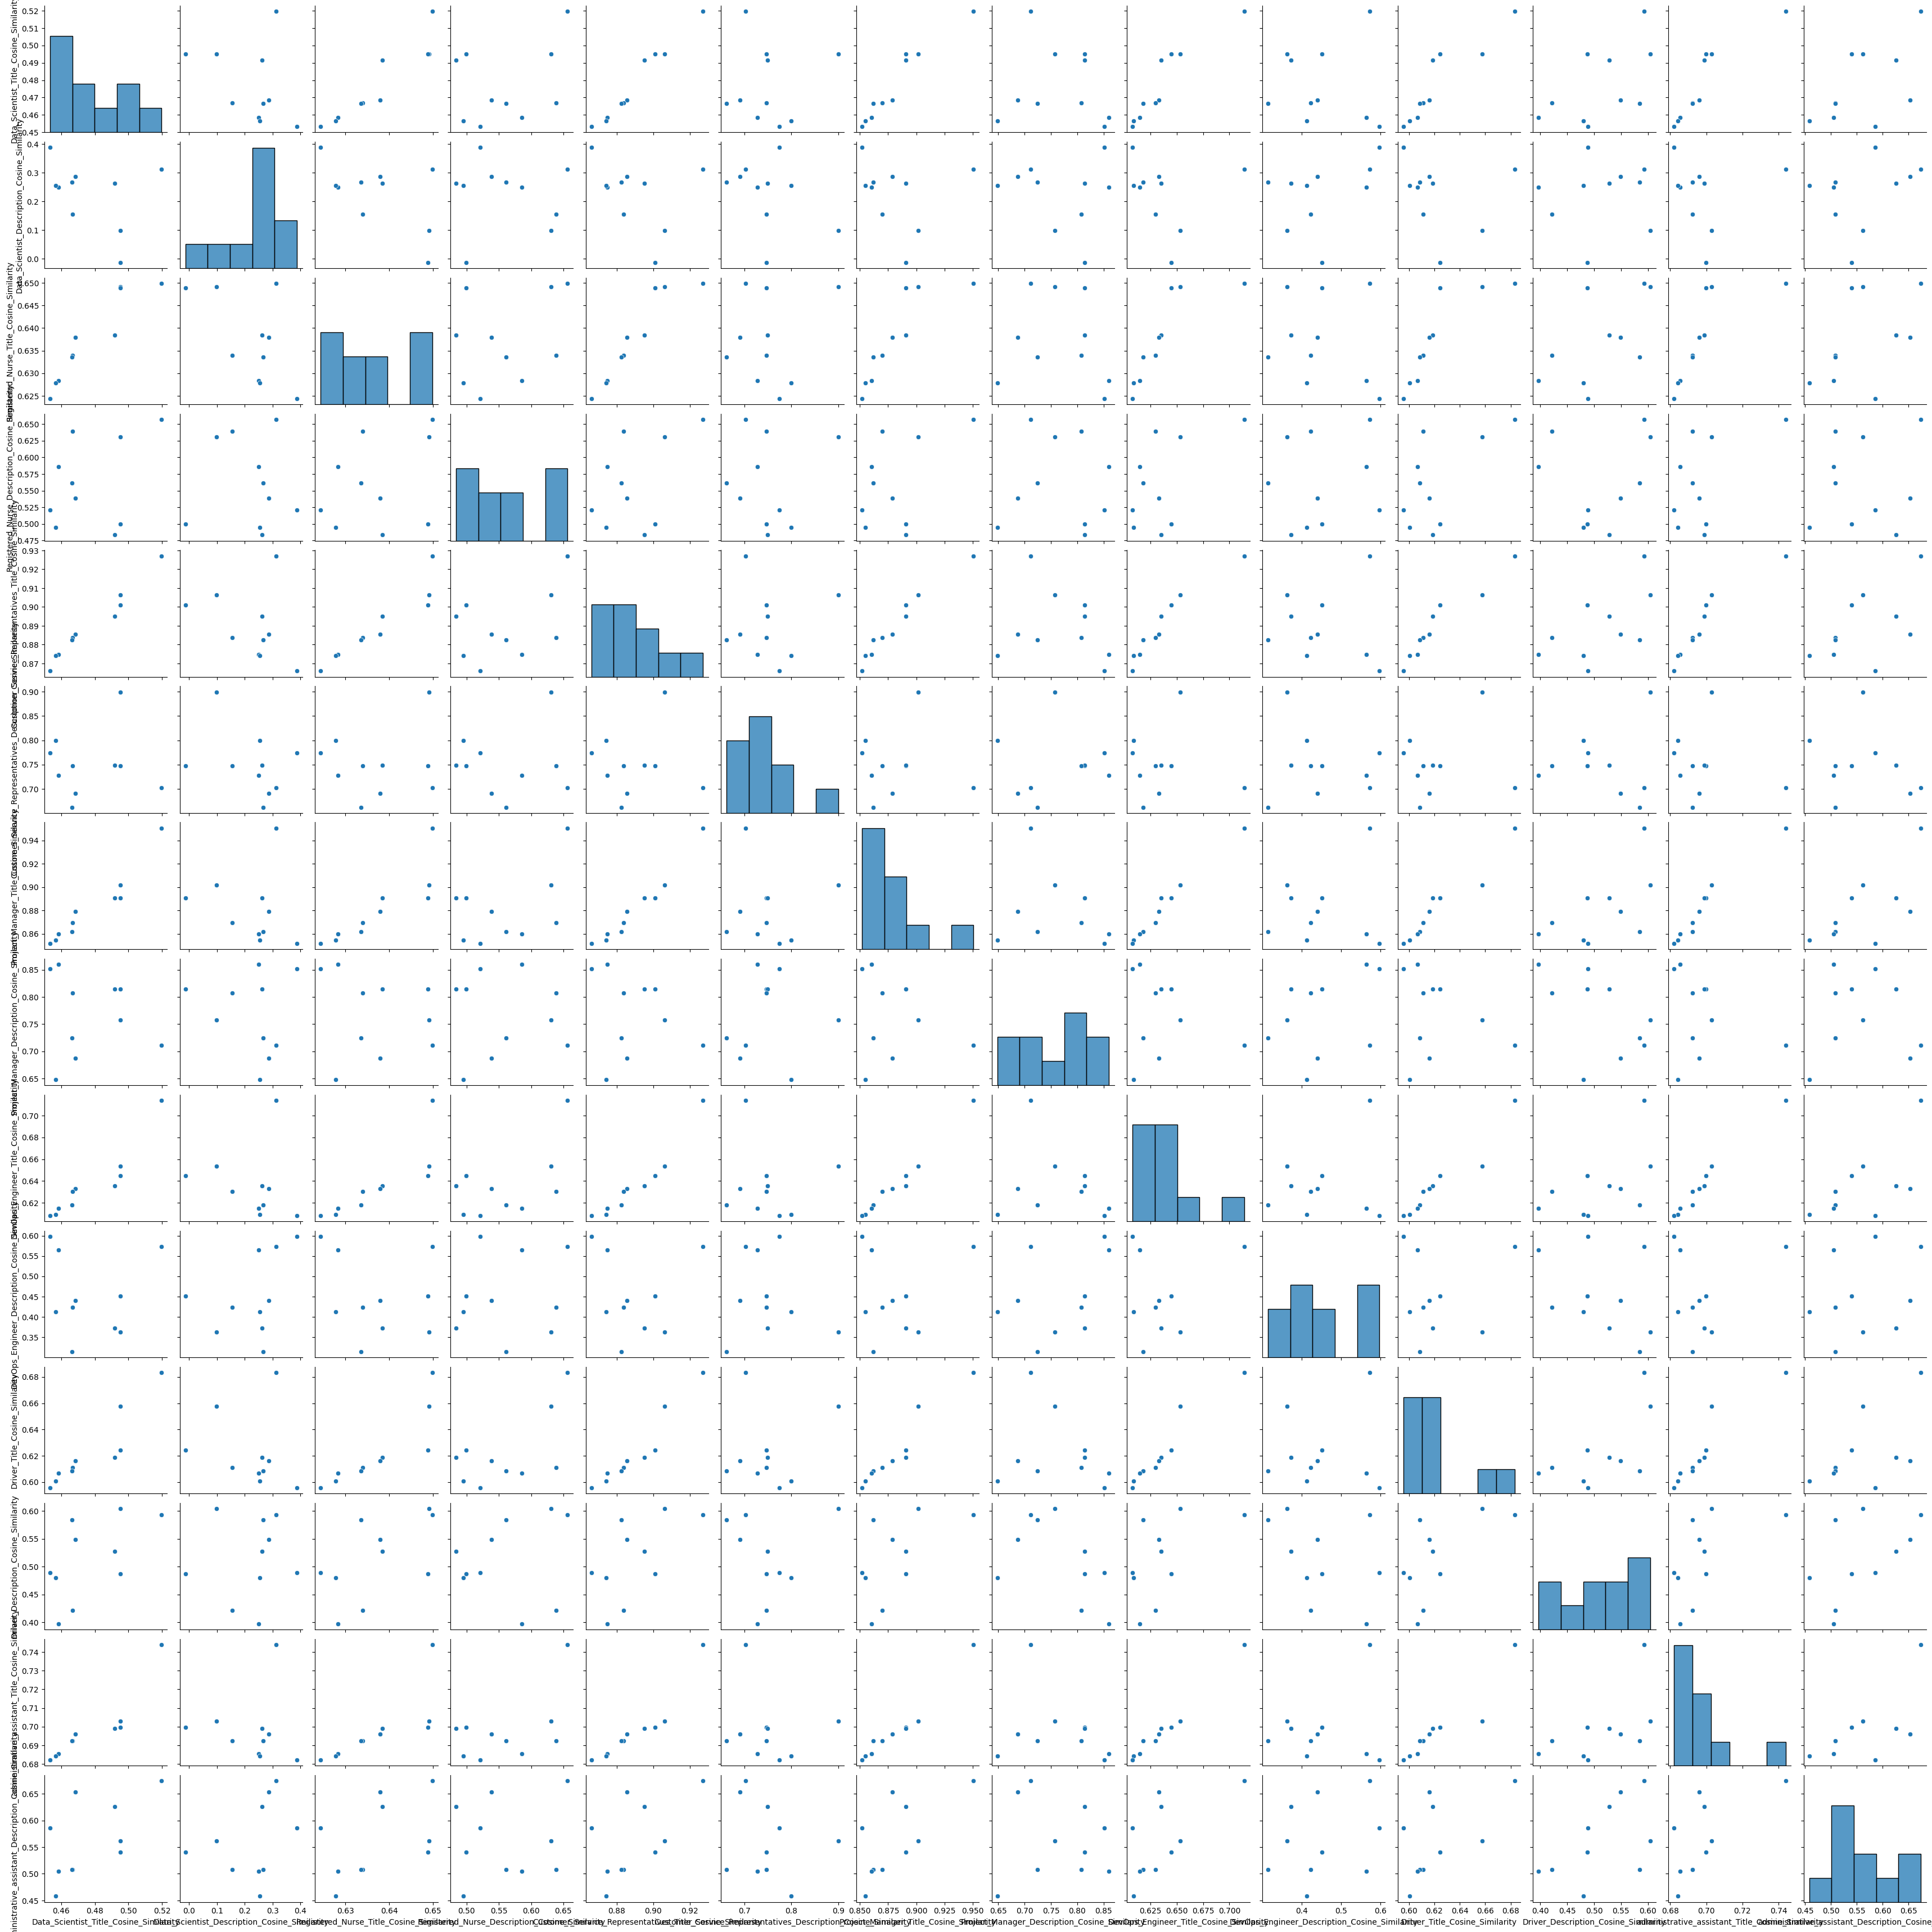

In [327]:
#Plotting a pairplot to observe the amount of correlations amongst job-title, course-title, and course-description data through observation of the number 
#of clusters developed
sns.pairplot(cosine_df)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Axes: >

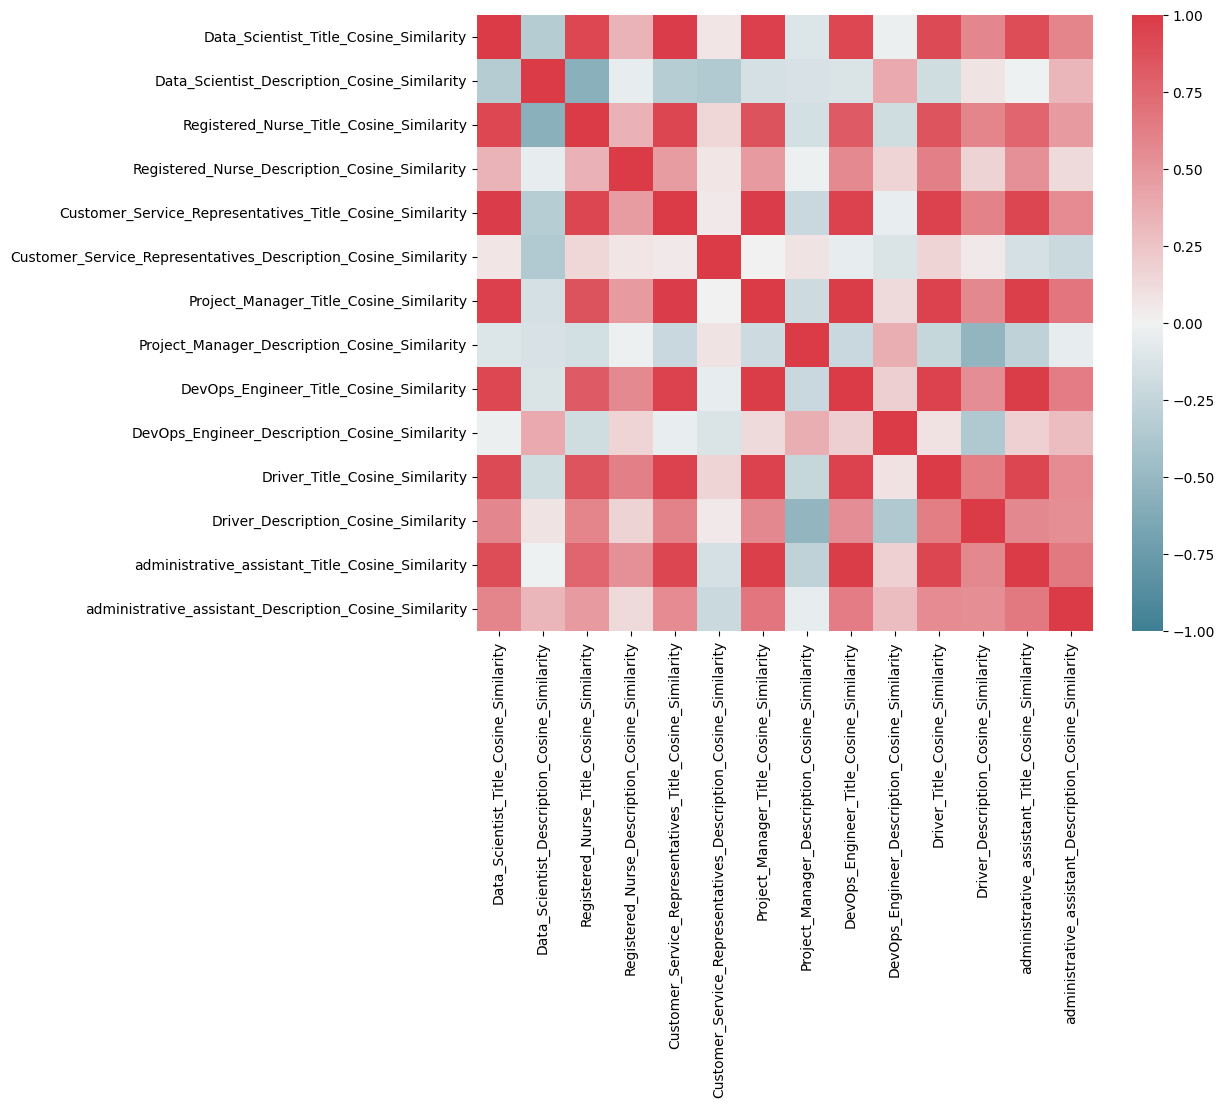

In [328]:
#Plotting the Cosine Similarities amongst the different job titles, the course desciptions, and the course titles

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = cosine_df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)